In [1]:
# pip install ipykernel

In [2]:
# pip install easyocr torch

In [3]:
# pip install pandas

In [ ]:
# pip install requests

In [ ]:
# pip install pyspellchecker


In [ ]:
# pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import os
from typing import List 
import easyocr
import re
import requests
import shutil
from spellchecker import SpellChecker
import matplotlib.pyplot as plt

## Download images

In [ ]:
# def download_image(url, save_folder):
#     # Send a HTTP request to the specified URL
#     response = requests.get(url, stream=True)
#     # Check if the request was successful
#     if response.status_code == 200:
#         # Extract the filename from the URL
#         filename = url.split('/')[-1]
#         # Construct the full path to save the image (relative to the current directory)
#         save_path = os.path.join(os.getcwd(), save_folder, filename)
#         # Open the specified file path in write-binary mode
#         with open(save_path, 'wb') as out_file:
#             # Copy the content of the response to the file
#             shutil.copyfileobj(response.raw, out_file)
#         print(f"Image successfully downloaded: {save_path}")
#     else:
#         print(f"Failed to retrieve image. HTTP Status code: {response.status_code}")

# # URL of the image to be downloaded
# image_url = 'https://www.stats.gov.cn/sj/ndsj/2023/html/E19-03.jpg'
# # Folder where the image will be saved (relative path)
# save_folder = 'Real_estate'

# # Download the image
# download_image(image_url, save_folder)

In [5]:
# # Download multiple images

# # Function to download an image from a URL
# def download_image(url, save_path):
#     response = requests.get(url)
#     if response.status_code == 200:
#         with open(save_path, 'wb') as f:
#             f.write(response.content)
#         print(f"Downloaded {save_path}")
#     else:
#         print(f"Failed to download {url}")

# # Base URL parts
# base_url = "https://www.stats.gov.cn/sj/ndsj/2023/html/E19-"
# file_extension = ".jpg"

# # Directory to save images
# save_dir = "..\Data\Raw\Real_estate"
# # os.makedirs(save_dir, exist_ok=True)
# os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists


# # Range of numbers to download images
# start_num = 4
# end_num = 17

# # Loop through the range and download each image
# for i in range(start_num, end_num + 1):
#     # Construct the URL
#     image_num = f"{i:02}"  # Format number to be two digits
#     url = f"{base_url}{image_num}{file_extension}"
    
#     # Construct the save path
#     save_path = os.path.join(save_dir, f"E19-{image_num}{file_extension}")
    
#     # Download and save the image
#     download_image(url, save_path)

Downloaded ..\Data\Raw\Real_estate\E19-04.jpg
Downloaded ..\Data\Raw\Real_estate\E19-05.jpg
Downloaded ..\Data\Raw\Real_estate\E19-06.jpg
Downloaded ..\Data\Raw\Real_estate\E19-07.jpg
Downloaded ..\Data\Raw\Real_estate\E19-08.jpg
Downloaded ..\Data\Raw\Real_estate\E19-09.jpg
Downloaded ..\Data\Raw\Real_estate\E19-10.jpg
Downloaded ..\Data\Raw\Real_estate\E19-11.jpg
Downloaded ..\Data\Raw\Real_estate\E19-12.jpg
Downloaded ..\Data\Raw\Real_estate\E19-13.jpg
Downloaded ..\Data\Raw\Real_estate\E19-14.jpg
Downloaded ..\Data\Raw\Real_estate\E19-15.jpg
Downloaded ..\Data\Raw\Real_estate\E19-16.jpg
Downloaded ..\Data\Raw\Real_estate\E19-17.jpg


## OCR

In [2]:
reader = easyocr.Reader(['en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [3]:
def ocr_scan(image_path: str) -> str:
    result = reader.readtext(str(image_path))
    # print("Result: ", result)
    # for element in result:
    #     print("Element: ", element)
        
    recognized = " ".join(element[1] for element in result)
    return recognized

## Preprocessing and Visualization

### Image E19-01

In [ ]:
img_path = "..\..\Data\Raw\Real_estate\E19-01.jpg" # Main indicator of real estate
real_estate_indicator = ocr_scan(img_path)

In [5]:
real_estate_indicator

'19-2 Number of Enterprises for Real Estate Development (unit) Number of Domestic Enterprises Foreign Year Enterprises Invested State-owned Collective- with Investnent Invested Region Enterprises Enterprises owned from Hong Kong; Enterprises Enterprises Macao and Taiwan 998 24378 19960 7958 4538 3214 1204 2000 27303 23277 6641 3492 2899 1127 2005 56290 50957 4145 1796 3443 1890 2006 58710 53268 3797 1586 3519 1923 2007 62518 56965 3617 1430 3524 2029 2008 87562 81282 3941 1520 3916 2364 2009 80407 74674 3835 1361 3633 2100 2010 85218 79489 3685 1220 3677 2052 2011 88419 83011 3427 1023 3565 1843 2012 89859 84695 3354 904 3451 1713 2013 91444 86379 1739 570 3391 1674 201- 94197 89218 1476 457 3414 1565 2015 93426 88773 1329 409 3235 1418 2016 94948 90408 1093 364 3232 1308 2017 95897 91608 943 319 3066 1223 2018 97937 94063 767 280 2719 1155 2019 99544 95691 671 230 2664 1189 2020 103262 99150 1133 227 2759 1353 2021 105434 101374 1209 208 2703 1357 2022 102852 99054 1387 185 2550 1248 

#### Spellchecker

In [36]:
# from spellchecker import SpellChecker

# Initialize spell checker
# spell_checker = SpellChecker()

# # Test sentence
# sentence = "State Otned Enterprises"

# # Split sentence into words
# words = sentence.split()

# # Check each word
# for word in words:
#     # if spell_checker.correction(word) == word:
#     #     print(f"{word} is spelled correctly.")
#     # else:
#     #     suggestions = spell_checker.candidates(word)
#     #     print(f"{word} is misspelled. Suggestions: {suggestions}")
#     print(spell_checker.correction(word))


State
owned
Enterprises


#### Save into txt file

##### Remove the title of the table

In [6]:
ex_paragraph = real_estate_indicator

# Sentence to be removed
sentence_to_remove = "19-2 Number of Enterprises for Real Estate Development (unit) Number of Domestic Enterprises Foreign Year Enterprises Invested State-owned Collective- with Investnent Invested Region Enterprises Enterprises owned from Hong Kong; Enterprises Enterprises Macao and Taiwan "

# Define a function to remove the specified sentence
def remove_sentence(paragraph, sentence):
    # Escape special characters in the sentence for regex
    escaped_sentence = re.escape(sentence)
    # Use regex to remove the sentence and any extra whitespace that may be left
    modified_paragraph = re.sub(r'\s*{}\s*'.format(escaped_sentence), ' ', paragraph)
    # Clean up any extra spaces created by removal
    modified_paragraph = re.sub(r'\s{2,}', ' ', modified_paragraph).strip()
    return modified_paragraph

# Remove the specified sentence from the paragraph
updated_paragraph = remove_sentence(ex_paragraph, sentence_to_remove)

# Display the updated paragraph
print(updated_paragraph)

998 24378 19960 7958 4538 3214 1204 2000 27303 23277 6641 3492 2899 1127 2005 56290 50957 4145 1796 3443 1890 2006 58710 53268 3797 1586 3519 1923 2007 62518 56965 3617 1430 3524 2029 2008 87562 81282 3941 1520 3916 2364 2009 80407 74674 3835 1361 3633 2100 2010 85218 79489 3685 1220 3677 2052 2011 88419 83011 3427 1023 3565 1843 2012 89859 84695 3354 904 3451 1713 2013 91444 86379 1739 570 3391 1674 201- 94197 89218 1476 457 3414 1565 2015 93426 88773 1329 409 3235 1418 2016 94948 90408 1093 364 3232 1308 2017 95897 91608 943 319 3066 1223 2018 97937 94063 767 280 2719 1155 2019 99544 95691 671 230 2664 1189 2020 103262 99150 1133 227 2759 1353 2021 105434 101374 1209 208 2703 1357 2022 102852 99054 1387 185 2550 1248 Beijing 1182 1109 Tianjin 1127 1064 Hebei 4036 4002 Shanxi 2768 2756 Inner Mongolia 1711 1710 Liaoning 2757 2558 149 Jilin 1444 1432 Heilongjiang 1359 1344 Shanghai 2660 2297 128 267 Jiangsu 7146 5574 188 426 146 Zhejiang 6599 5341 130 128 Anhui 3962 902 Fujian 3426 3162

##### Save into txt file

In [ ]:
spell_checker = SpellChecker()

def separate_paragraph(paragraph):
    # Define the regex pattern to find groups of words followed by 3 to 4 consecutive numbers
    # pattern = re.compile(r'([a-zA-Z\s]+)((?:\s\d+(?:\.\d+)?){2,4})')
    # pattern = re.compile(r'([a-zA-Z\s\(\)]+)((?:\s\d+(?:\.\d+)?){2,4})')
    # pattern = re.compile(r'([a-zA-Z\s\(\)_]+)((?:\s\d+(?:\.\d+)?_?){2,4})')
    # pattern = re.compile(r'([a-zA-Z\s\-,\(\)._]+)((?:\s\d+(?:\.\d+)?_?){2,4})')
    
    # E19_01
    # pattern = re.compile(r'([a-zA-Z\s\-,\(\)._]+)((?:\s\d+(?:\.\d+)?_?){2,4})')
    
    #E19_02
    pattern = re.compile(r'((?:\s\d+(?:\.\d+)?_?)((?:\s\d+(?:\.\d+)?_?){4,6})')
    
    # Find all matches in the paragraph
    matches = pattern.findall(paragraph)
    
    lines = []
    for match in matches:
        # Combine the words part and the numbers part into a single line
        words = match[0].strip()
        
        # for word in words:
        #     if spell_checker.correction(word) != word:
        #         # print(f"{word} is spelled correctly.")
        #         word = spell_checker.candidates(word)
        #     # else:
        #     #     suggestions = spell_checker.candidates(word)
        #     #     print(f"{word} is misspelled. Suggestions: {suggestions}")
        #     # print(spell_checker.correction(word))
        
        numbers = match[1].strip()
        line = f"{words} {numbers}"
        lines.append(line)
    
    return lines

# Example input paragraph
paragraph = updated_paragraph

# Call the function and print the results
lines = separate_paragraph(paragraph)

output_e19_02 = "..\..\Data\Preprocessed\preprocessed_txt\Real_estate\E19_02.txt"

# with open(output_e19_01, 'w') as file:
#     for line in lines:
#         file.write(line + '\n')

# for line in lines:
#     print(line)


##### Read from txt file to create pandas data frame

In [ ]:
def separate_lines(lines):
    # Define the regex pattern to find groups of words followed by 3 to 4 consecutive numbers
    # pattern = re.compile(r'([a-zA-Z\s\(\)_]+)((?:\s\d+(?:\.\d+)?_?){2,4})')
    # pattern = re.compile(r'([a-zA-Z\s\-,\(\)]+)((?:\s\d+(?:\.\d+)?_?){2,4})')
    pattern = re.compile(r'([a-zA-Z\s\-,\(\)._]+)((?:\s\d+(?:\.\d+)?_?){2,4})')
    
    data = []
    for line in lines:
        # Match the line with the regex pattern
        match = pattern.match(line)
        if match:
            words = match.group(1).strip()
            numbers = match.group(2).strip().split()
            
            # Ensure numbers length is exactly 4
            while len(numbers) < 4:
                numbers.append(None)  # Fill missing numbers with None
            
            # Append the data row
            data.append([words] + numbers[:4])
    
    return data

# Specify the input text file name
input_txt = 'output.txt'

# Read lines from the text file
with open(input_txt, 'r') as file:
    lines = file.readlines()

# Strip newline characters from each line
lines = [line.strip() for line in lines if line.strip()]

# Call the function to get the results
data = separate_lines(lines)

# Create a DataFrame with the specified columns
df = pd.DataFrame(data, columns=['Item', 'Year 1', 'Year 2', 'Year 3', 'Year 4'])

# Specify the output CSV file name
output_csv = 'output.csv'

# Write the DataFrame to the CSV file
df.to_csv(output_csv, index=False)

print(f"The DataFrame has been saved to {output_csv}")

# Display the DataFrame
print(df)

### Image E19-02

In [7]:
img_path = "..\..\Data\Raw\Real_estate\E19-02.jpg" # Number of enterprises for real estate development (7 cols)
real_estate_enterprises = ocr_scan(img_path)

In [8]:
real_estate_enterprises

'19-2 Number of Enterprises for Real Estate Development (unit) Number of Domestic Enterprises Foreign Year Enterprises Invested State-owned Collective- with Investnent Invested Region Enterprises Enterprises owned from Hong Kong; Enterprises Enterprises Macao and Taiwan 998 24378 19960 7958 4538 3214 1204 2000 27303 23277 6641 3492 2899 1127 2005 56290 50957 4145 1796 3443 1890 2006 58710 53268 3797 1586 3519 1923 2007 62518 56965 3617 1430 3524 2029 2008 87562 81282 3941 1520 3916 2364 2009 80407 74674 3835 1361 3633 2100 2010 85218 79489 3685 1220 3677 2052 2011 88419 83011 3427 1023 3565 1843 2012 89859 84695 3354 904 3451 1713 2013 91444 86379 1739 570 3391 1674 201- 94197 89218 1476 457 3414 1565 2015 93426 88773 1329 409 3235 1418 2016 94948 90408 1093 364 3232 1308 2017 95897 91608 943 319 3066 1223 2018 97937 94063 767 280 2719 1155 2019 99544 95691 671 230 2664 1189 2020 103262 99150 1133 227 2759 1353 2021 105434 101374 1209 208 2703 1357 2022 102852 99054 1387 185 2550 1248 

In [9]:
ex_paragraph = real_estate_enterprises

# Sentence to be removed
sentence_to_remove = "19-2 Number of Enterprises for Real Estate Development (unit) Number of Domestic Enterprises Foreign Year Enterprises Invested State-owned Collective- with Investnent Invested Region Enterprises Enterprises owned from Hong Kong; Enterprises Enterprises Macao and Taiwan"

# Define a function to remove the specified sentence
def remove_sentence(paragraph, sentence):
    # Escape special characters in the sentence for regex
    escaped_sentence = re.escape(sentence)
    # Use regex to remove the sentence and any extra whitespace that may be left
    modified_paragraph = re.sub(r'\s*{}\s*'.format(escaped_sentence), ' ', paragraph)
    # Clean up any extra spaces created by removal
    modified_paragraph = re.sub(r'\s{2,}', ' ', modified_paragraph).strip()
    return modified_paragraph

# Remove the specified sentence from the paragraph
updated_paragraph = remove_sentence(ex_paragraph, sentence_to_remove)

# Display the updated paragraph
print(updated_paragraph)

998 24378 19960 7958 4538 3214 1204 2000 27303 23277 6641 3492 2899 1127 2005 56290 50957 4145 1796 3443 1890 2006 58710 53268 3797 1586 3519 1923 2007 62518 56965 3617 1430 3524 2029 2008 87562 81282 3941 1520 3916 2364 2009 80407 74674 3835 1361 3633 2100 2010 85218 79489 3685 1220 3677 2052 2011 88419 83011 3427 1023 3565 1843 2012 89859 84695 3354 904 3451 1713 2013 91444 86379 1739 570 3391 1674 201- 94197 89218 1476 457 3414 1565 2015 93426 88773 1329 409 3235 1418 2016 94948 90408 1093 364 3232 1308 2017 95897 91608 943 319 3066 1223 2018 97937 94063 767 280 2719 1155 2019 99544 95691 671 230 2664 1189 2020 103262 99150 1133 227 2759 1353 2021 105434 101374 1209 208 2703 1357 2022 102852 99054 1387 185 2550 1248 Beijing 1182 1109 Tianjin 1127 1064 Hebei 4036 4002 Shanxi 2768 2756 Inner Mongolia 1711 1710 Liaoning 2757 2558 149 Jilin 1444 1432 Heilongjiang 1359 1344 Shanghai 2660 2297 128 267 Jiangsu 7146 5574 188 426 146 Zhejiang 6599 5341 130 128 Anhui 3962 902 Fujian 3426 3162

In [11]:
def process_numbers(paragraph):
    # Split the paragraph into individual numbers
    numbers = paragraph.split()
    
    # Initialize a list to store the result lines
    result_lines = []
    
    # Process the numbers in chunks of 7
    for i in range(0, len(numbers), 7):
        # Extract the current chunk of 7 numbers
        chunk = numbers[i:i + 7]
        
        # If there are at least two numbers in the chunk, take the first two
        if len(chunk) >= 2:
            result_lines.append(f"{chunk[0]} {chunk[1]}")
    
    # Join the result lines with newline characters and return
    return "\n".join(result_lines)

# Example usage
paragraph = updated_paragraph
result = process_numbers(paragraph)
# print(result)
with open("..\..\Data\Preprocessed\preprocessed_txt\Real_estate\E19_02.txt", "w") as file:
    file.write(result)

print("Result has been saved to E19_02.txt")

Result has been saved to E19_02.txt


In [19]:
def create_dataframe_from_txt(file_path):
    # Initialize empty lists to store the data
    years = []
    num_enterprises_list = []

    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Clean and split the line into parts using regex to handle different separators
            parts = re.split(r'\s+|[-]', line.strip())
            if len(parts) == 2:
                try:
                    # Convert the parts to integers and append to the lists
                    year = int(parts[0])
                    num_enterprises = int(parts[1])
                    years.append(year)
                    num_enterprises_list.append(num_enterprises)
                except ValueError:
                    # Handle the case where conversion to int fails
                    print(f"Skipping line due to conversion error: {line.strip()}")
    
    # Create the DataFrame
    data = {'Year': years, 'Number of Enterprises': num_enterprises_list}
    df = pd.DataFrame(data)
    
    return df

# Example usage
file_path = '..\..\Data\Preprocessed\preprocessed_txt\Real_estate\E19_02.txt'
df = create_dataframe_from_txt(file_path)
print(df)

    Year  Number of Enterprises
0   1998                  24378
1   2000                  27303
2   2005                  56290
3   2006                  58710
4   2007                  62518
5   2008                  87562
6   2009                  80407
7   2010                  85218
8   2011                  88419
9   2012                  89859
10  2013                  91444
11  2014                  94197
12  2015                  93426
13  2016                  94948
14  2017                  95897
15  2018                  97937
16  2019                  99544
17  2020                 103262
18  2021                 105434
19  2022                 102852


#### Plot line chart

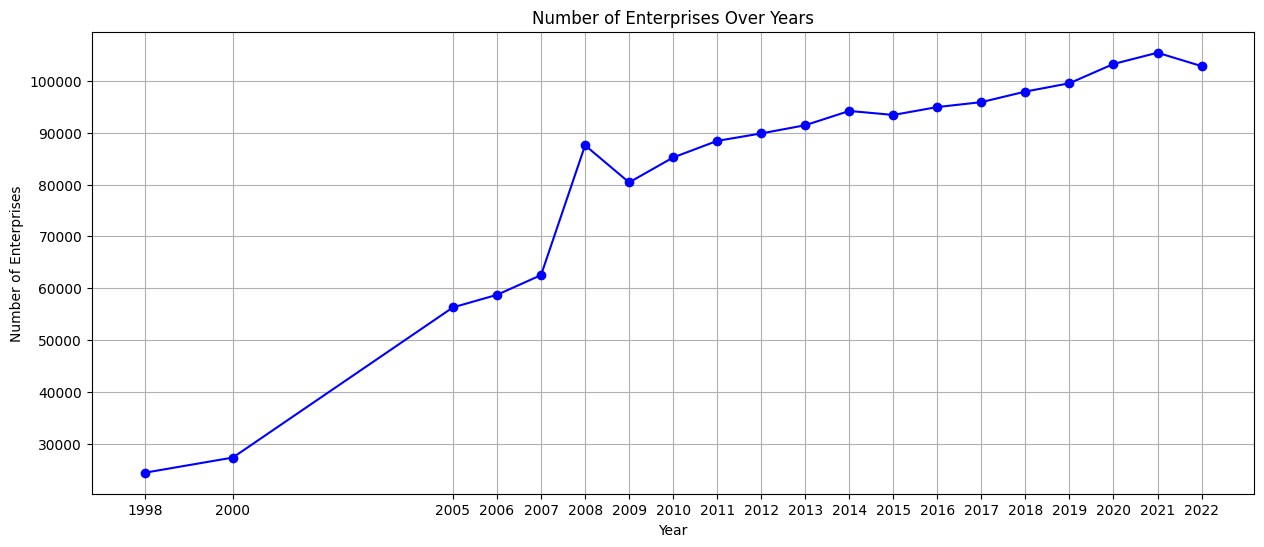

In [20]:
# def plot_line_chart(df):
#     # Plot the line chart
#     plt.figure(figsize=(10, 6))
#     plt.plot(df['Year'], df['Number of Enterprises'], marker='o', linestyle='-', color='b')
#     plt.xlabel('Year')
#     plt.ylabel('Number of Enterprises')
#     plt.title('Number of Enterprises Over Years')
#     plt.grid(True)
#     plt.show()

def plot_line_chart(df, filename):
    # Plot the line chart
    plt.figure(figsize=(15, 6))
    plt.plot(df['Year'], df['Number of Enterprises'], marker='o', linestyle='-', color='b')
    
    # Set the ticks on the x-axis to be the specific years in the DataFrame
    plt.xticks(df['Year'])
    
    plt.xlabel('Year')
    plt.ylabel('Number of Enterprises')
    plt.title('Number of Enterprises Over Years')
    plt.grid(True)
    
    # Save the plot as a PNG file
    plt.savefig(filename)
    
    plt.show()

# Example usage
# file_path = 'path_to_your_file.txt'
# df = create_dataframe_from_txt(file_path)
# print(df)
plot_line_chart(df, "..\..\Saved figures\Real estate\Enterprises.png")

### Image E19-03

In [4]:
img_path = "..\..\Data\Raw\Real_estate\E19-03.jpg" # Number of enterprises for real estate development (7 cols)
number_of_employed = ocr_scan(img_path)

In [5]:
number_of_employed

'19-3 Number of Employed Persons in Enterprises for Real Estate Development (person) Average Year Number of Domestic Enterprises Foreign Employed Invested State-owned Collective - with Investment Invested Region Persons Enterprises Enterprises owned from Hong Kong: Enterprises Enterprises Macao and Taiwan 1998 825888 708738 332834 134939 83784 33366 2000 971942 862245 292252 116416 79066 30631 2005 1516150 1366743 140106 40978 90674 58733 2006 1600930 1442158 132259 38367 97688 61084 2007 1719666 1541336 121137 34498 100398 77932 2008 2100362 1906029 127511 29602 109246 85087 2009 1949295 1763867 123866 29049 109965 75463 2010 2091147 1908969 155156 25428 105846 76332 2011 2256964 2075474 135420 21237 112990 68500 2012 2386772 2199815 123593 20398 116849 70108 2013 2591814 2397762 66072 12976 121807 72245 201- 2760070 2561817 61512 11414 129287 68966 2015 2738454 2551484 57273 10771 124494 62476 2016 2752298 2576545 47085 9916 118495 57258 2017 2830960 2663954 37904 9092 113221 53785 2

In [6]:
ex_paragraph = number_of_employed

# Sentence to be removed
sentence_to_remove = "19-3 Number of Employed Persons in Enterprises for Real Estate Development (person) Average Year Number of Domestic Enterprises Foreign Employed Invested State-owned Collective - with Investment Invested Region Persons Enterprises Enterprises owned from Hong Kong: Enterprises Enterprises Macao and Taiwan"

# Define a function to remove the specified sentence
def remove_sentence(paragraph, sentence):
    # Escape special characters in the sentence for regex
    escaped_sentence = re.escape(sentence)
    # Use regex to remove the sentence and any extra whitespace that may be left
    modified_paragraph = re.sub(r'\s*{}\s*'.format(escaped_sentence), ' ', paragraph)
    # Clean up any extra spaces created by removal
    modified_paragraph = re.sub(r'\s{2,}', ' ', modified_paragraph).strip()
    return modified_paragraph

# Remove the specified sentence from the paragraph
updated_paragraph = remove_sentence(ex_paragraph, sentence_to_remove)

# Display the updated paragraph
print(updated_paragraph)

1998 825888 708738 332834 134939 83784 33366 2000 971942 862245 292252 116416 79066 30631 2005 1516150 1366743 140106 40978 90674 58733 2006 1600930 1442158 132259 38367 97688 61084 2007 1719666 1541336 121137 34498 100398 77932 2008 2100362 1906029 127511 29602 109246 85087 2009 1949295 1763867 123866 29049 109965 75463 2010 2091147 1908969 155156 25428 105846 76332 2011 2256964 2075474 135420 21237 112990 68500 2012 2386772 2199815 123593 20398 116849 70108 2013 2591814 2397762 66072 12976 121807 72245 201- 2760070 2561817 61512 11414 129287 68966 2015 2738454 2551484 57273 10771 124494 62476 2016 2752298 2576545 47085 9916 118495 57258 2017 2830960 2663954 37904 9092 113221 53785 2018 2889165 2735301 31383 6585 104378 49486 2019 2937379 2784130 25129 5018 103746 49503 2020 2901253 2746467 36517 4953 101924 52862 2021 2801571 2657629 35442 4085 92414 51528 2022 2446671 2328044 37407 4521 78151 40476 38717 34789 2238 1690 Tianjin 24793 21779 1237 1997 1017 Hebei 99016 97836 370 543 Sh

In [7]:
def process_numbers(paragraph):
    # Split the paragraph into individual numbers
    numbers = paragraph.split()
    
    # Initialize a list to store the result lines
    result_lines = []
    
    # Process the numbers in chunks of 7
    for i in range(0, len(numbers), 7):
        # Extract the current chunk of 7 numbers
        chunk = numbers[i:i + 7]
        
        # If there are at least two numbers in the chunk, take the first two
        if len(chunk) >= 2:
            result_lines.append(f"{chunk[0]} {chunk[1]}")
    
    # Join the result lines with newline characters and return
    return "\n".join(result_lines)

# Example usage
paragraph = updated_paragraph
result = process_numbers(paragraph)
# print(result)
with open("..\..\Data\Preprocessed\preprocessed_txt\Real_estate\E19_03.txt", "w") as file:
    file.write(result)

print("Result has been saved to E19_03.txt")

Result has been saved to E19_03.txt


In [17]:
def create_dataframe_from_txt(file_path):
    # Initialize empty lists to store the data
    years = []
    num_employed_list = []

    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Clean and split the line into parts using regex to handle different separators
            parts = re.split(r'\s+|[-]', line.strip())
            if len(parts) == 2:
                try:
                    # Convert the parts to integers and append to the lists
                    year = int(parts[0])
                    num_enterprises = int(parts[1])
                    years.append(year)
                    num_employed_list.append(num_enterprises)
                except ValueError:
                    # Handle the case where conversion to int fails
                    print(f"Skipping line due to conversion error: {line.strip()}")
    
    # Create the DataFrame
    data = {'Year': years, 'Average Number of employed people': num_employed_list}
    df = pd.DataFrame(data)
    
    return df

# Example usage
file_path = '..\..\Data\Preprocessed\preprocessed_txt\Real_estate\E19_03.txt'
df = create_dataframe_from_txt(file_path)
print(df)

    Year  Average Number of employed people
0   1998                             825888
1   2000                             971942
2   2005                            1516150
3   2006                            1600930
4   2007                            1719666
5   2008                            2100362
6   2009                            1949295
7   2010                            2091147
8   2011                            2256964
9   2012                            2386772
10  2013                            2591814
11  2014                            2760070
12  2015                            2738454
13  2016                            2752298
14  2017                            2830960
15  2018                            2889165
16  2019                            2937379
17  2020                            2901253
18  2021                            2801571
19  2022                            2446671


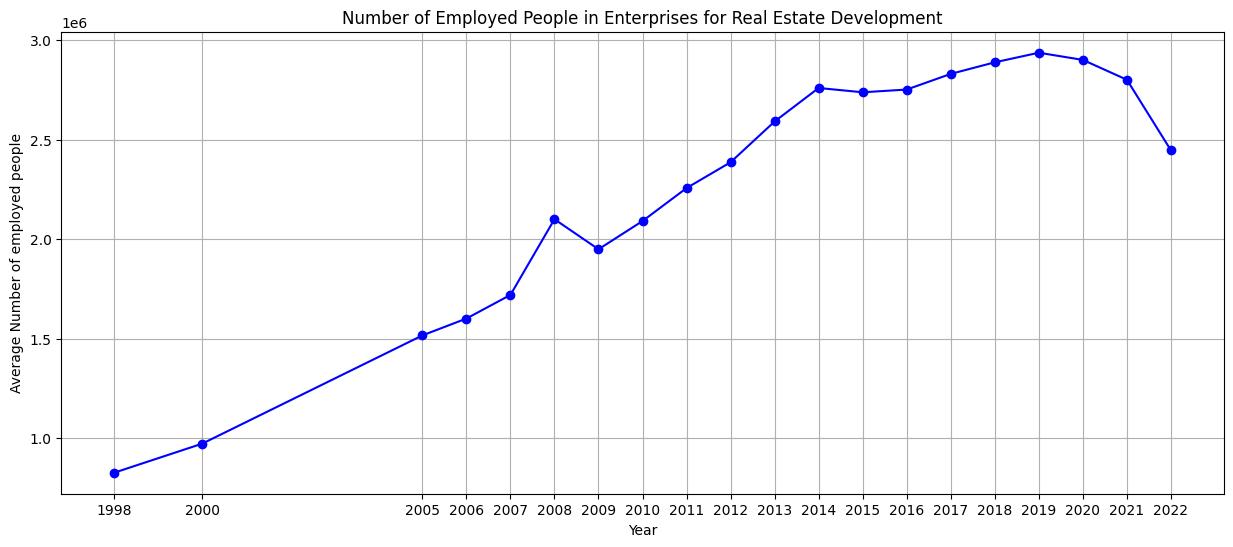

In [18]:
def plot_line_chart(df, filename):
    # Plot the line chart
    plt.figure(figsize=(15, 6))
    plt.plot(df['Year'], df['Average Number of employed people'], marker='o', linestyle='-', color='b')
    
    # Set the ticks on the x-axis to be the specific years in the DataFrame
    plt.xticks(df['Year'])
    
    plt.xlabel('Year')
    plt.ylabel('Average Number of employed people')
    plt.title('Number of Employed People in Enterprises for Real Estate Development')
    plt.grid(True)
    
    # Save the plot as a PNG file
    plt.savefig(filename)
    
    plt.show()

# Example usage
# file_path = 'path_to_your_file.txt'
# df = create_dataframe_from_txt(file_path)
# print(df)
plot_line_chart(df, "..\..\Saved figures\Real estate\Employed.png")

In [16]:
def process_numbers_f(paragraph):
    # Split the paragraph into individual numbers
    numbers = paragraph.split()
    
    # Initialize a list to store the result lines
    result_lines = []
    
    # Process the numbers in chunks of 7
    for i in range(0, len(numbers), 7):
        # Extract the current chunk of 7 numbers
        chunk = numbers[i:i + 7]
        
        # If there are at least two numbers in the chunk, take the first two
        if len(chunk) >= 7:
            result_lines.append(f"{chunk[0]} {chunk[6]}")
    
    # Join the result lines with newline characters and return
    return "\n".join(result_lines)

# Example usage
paragraph = updated_paragraph
result = process_numbers_f(paragraph)
# print(result)
with open("..\..\Data\Preprocessed\preprocessed_txt\Real_estate\E19_03_foreign.txt", "w") as file:
    file.write(result)

print("Result has been saved to E19_03_foreign.txt")

Result has been saved to E19_03_foreign.txt


In [23]:
def create_dataframe_from_txt(file_path):
    # Initialize empty lists to store the data
    years = []
    num_employed_f_list = []

    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Clean and split the line into parts using regex to handle different separators
            parts = re.split(r'\s+|[-]', line.strip())
            if len(parts) == 2:
                try:
                    # Convert the parts to integers and append to the lists
                    year = int(parts[0])
                    num_enterprises = int(parts[1])
                    years.append(year)
                    num_employed_f_list.append(num_enterprises)
                except ValueError:
                    # Handle the case where conversion to int fails
                    print(f"Skipping line due to conversion error: {line.strip()}")
    
    # Create the DataFrame
    data = {'Year': years, 'Average Number of employed people in Foreign invested enterprises': num_employed_f_list}
    df = pd.DataFrame(data)
    
    return df

# Example usage
file_path = '..\..\Data\Preprocessed\preprocessed_txt\Real_estate\E19_03_foreign.txt'
df = create_dataframe_from_txt(file_path)
print(df)

    Year  Average Number of employed people in Foreign invested enterprises
0   1998                                              33366                
1   2000                                              30631                
2   2005                                              58733                
3   2006                                              61084                
4   2007                                              77932                
5   2008                                              85087                
6   2009                                              75463                
7   2010                                              76332                
8   2011                                              68500                
9   2012                                              70108                
10  2013                                              72245                
11  2014                                              68966                
12  2015    

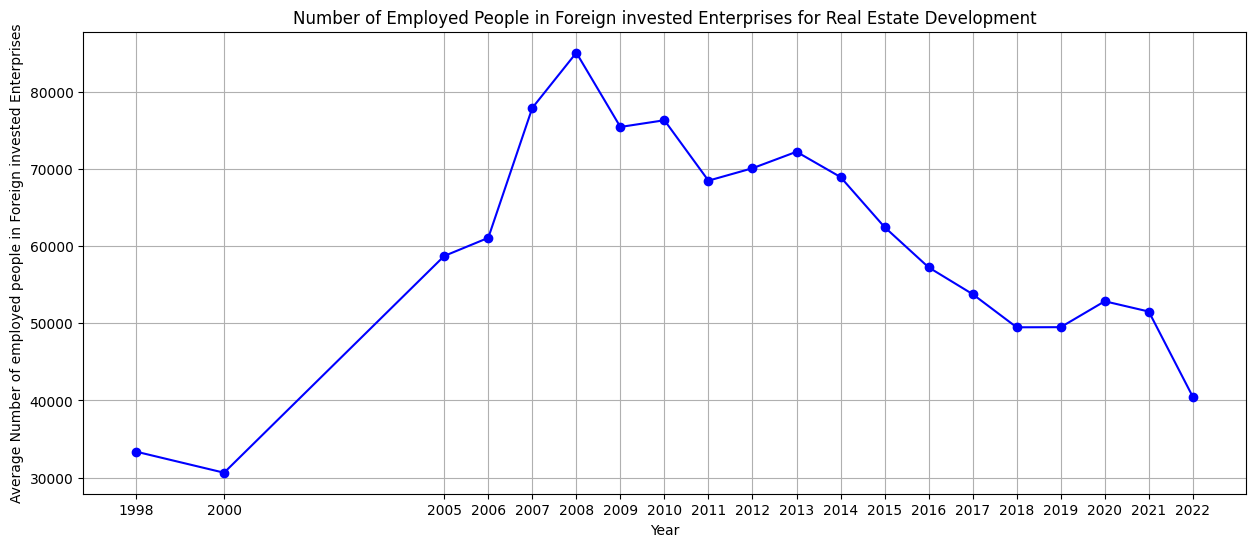

In [24]:
def plot_line_chart(df, filename):
    # Plot the line chart
    plt.figure(figsize=(15, 6))
    plt.plot(df['Year'], df['Average Number of employed people in Foreign invested enterprises'], marker='o', linestyle='-', color='b')
    
    # Set the ticks on the x-axis to be the specific years in the DataFrame
    plt.xticks(df['Year'])
    
    plt.xlabel('Year')
    plt.ylabel('Average Number of employed people in Foreign invested Enterprises')
    plt.title('Number of Employed People in Foreign invested Enterprises for Real Estate Development')
    plt.grid(True)
    
    # Save the plot as a PNG file
    plt.savefig(filename)
    
    plt.show()

# Example usage
# file_path = 'path_to_your_file.txt'
# df = create_dataframe_from_txt(file_path)
# print(df)
plot_line_chart(df, "..\..\Saved figures\Real estate\Employed_foreign.png")